In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import plotly
import plotly.express as px

%matplotlib notebook

In [2]:
churn_data = pd.read_csv('../data/churn.csv')
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.



<IPython.core.display.Javascript object>


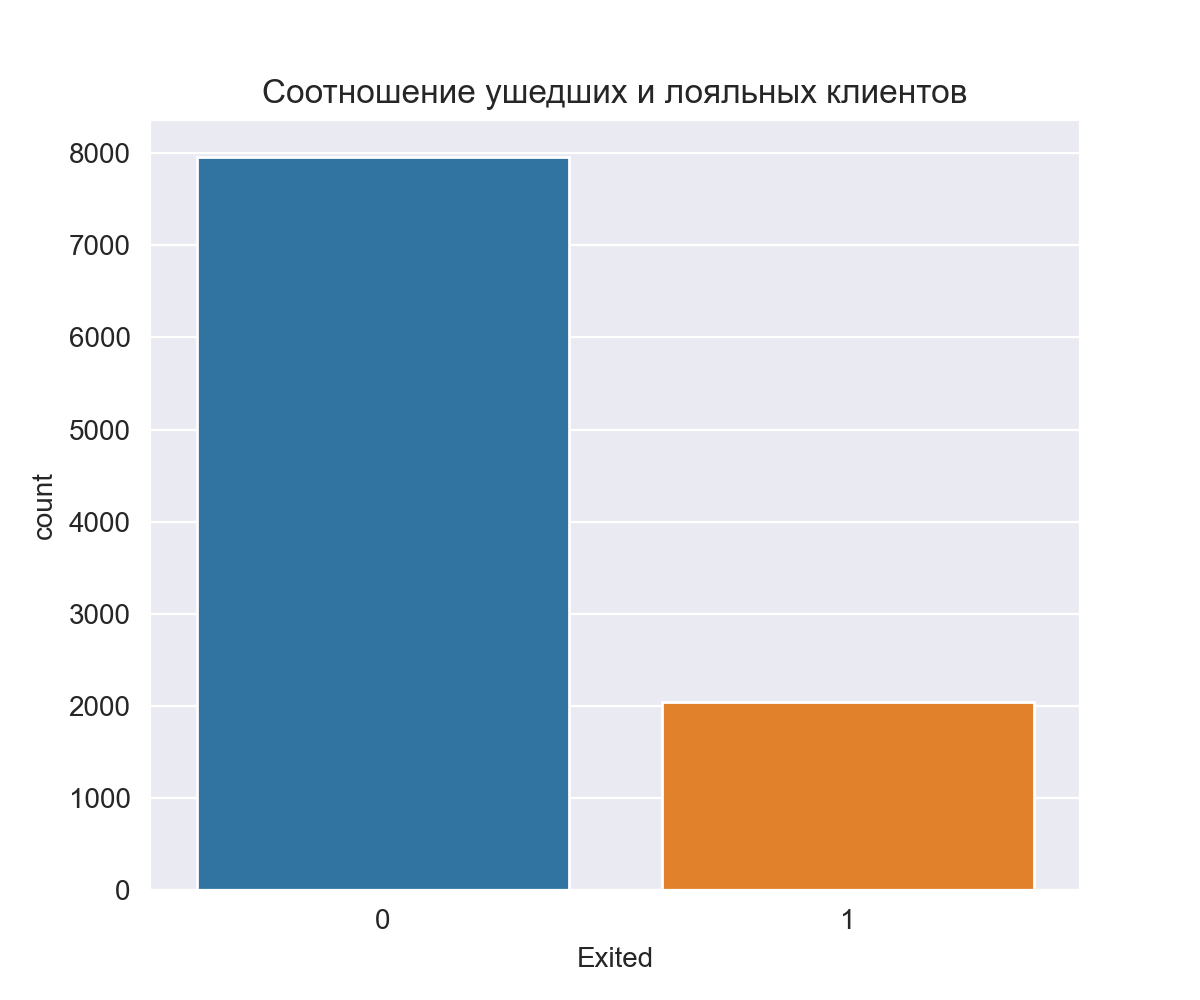

In [3]:
plt.figure(figsize=(6,5))
sns.countplot(x='Exited',  data=churn_data[['Exited']])
plt.title(label='Cоотношение ушедших и лояльных клиентов')
plt.show()

Соотношение классов(1 - класс ушедших, 0 - класс оставшихся) в датасете не сбаланансированное.

#### 

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

<IPython.core.display.Javascript object>


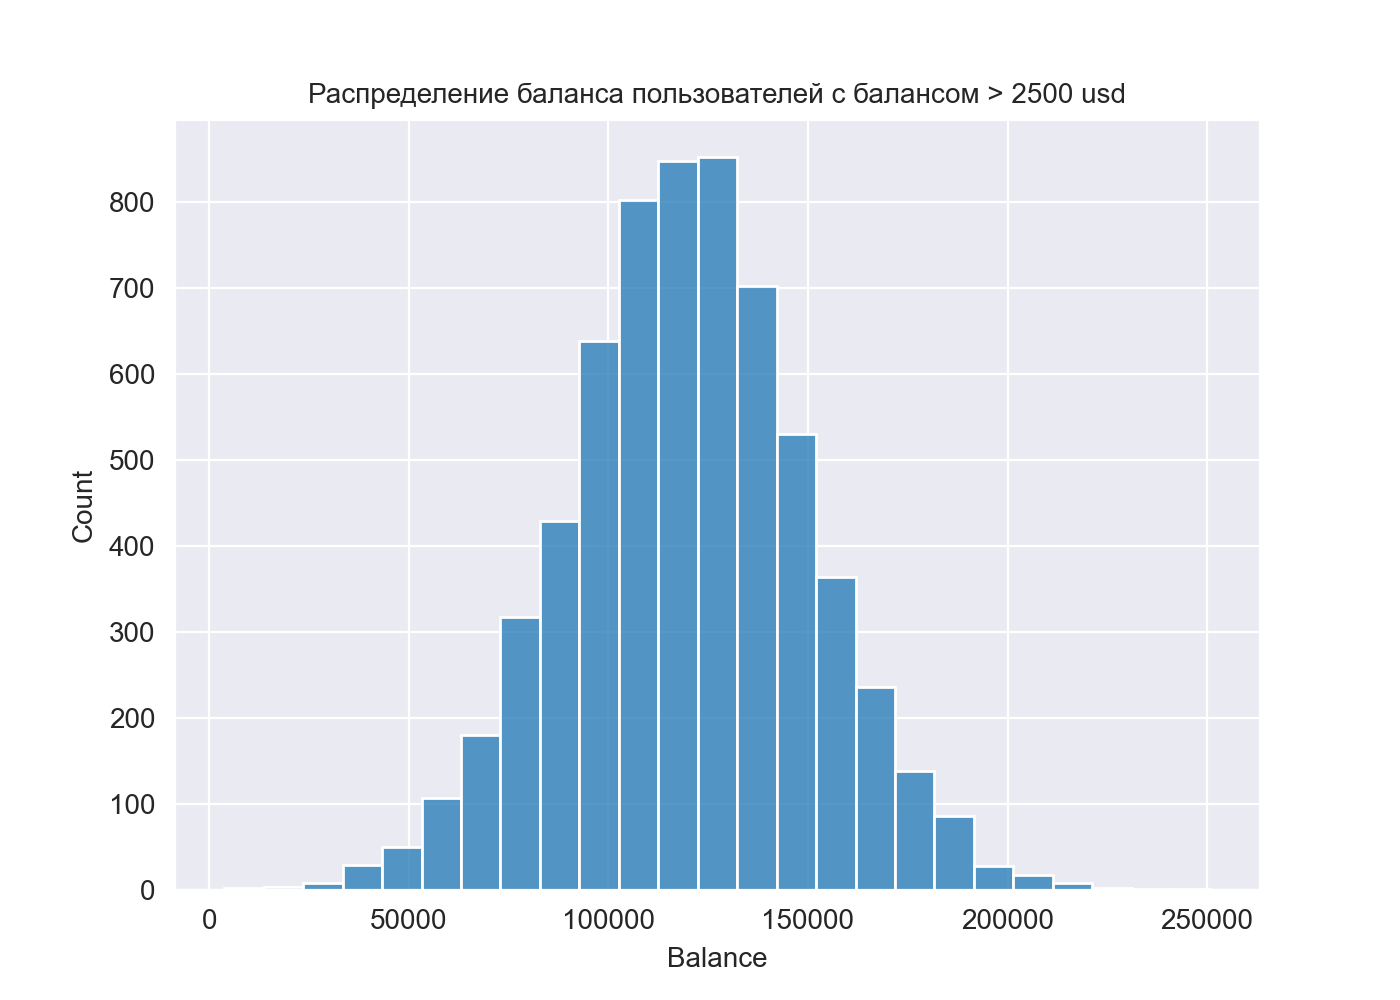

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64


In [4]:
df = churn_data[churn_data.Balance > 2500]

fig, axes = plt.subplots(figsize=(7, 5))
sns.histplot(
    data=df,
    x='Balance',
    bins=25,
    kde=False,
    ax=axes
);
axes.set_title('Распределение баланса пользователей с балансом > 2500 usd', fontsize=10)
plt.show()
print(df.Balance.describe())

Распределение сильно близко к нормальному. Наблюдения, которые лежат за пределами интервала (mean-3*std, mean+3*std), можно считать выбросами.

#### 

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

<IPython.core.display.Javascript object>


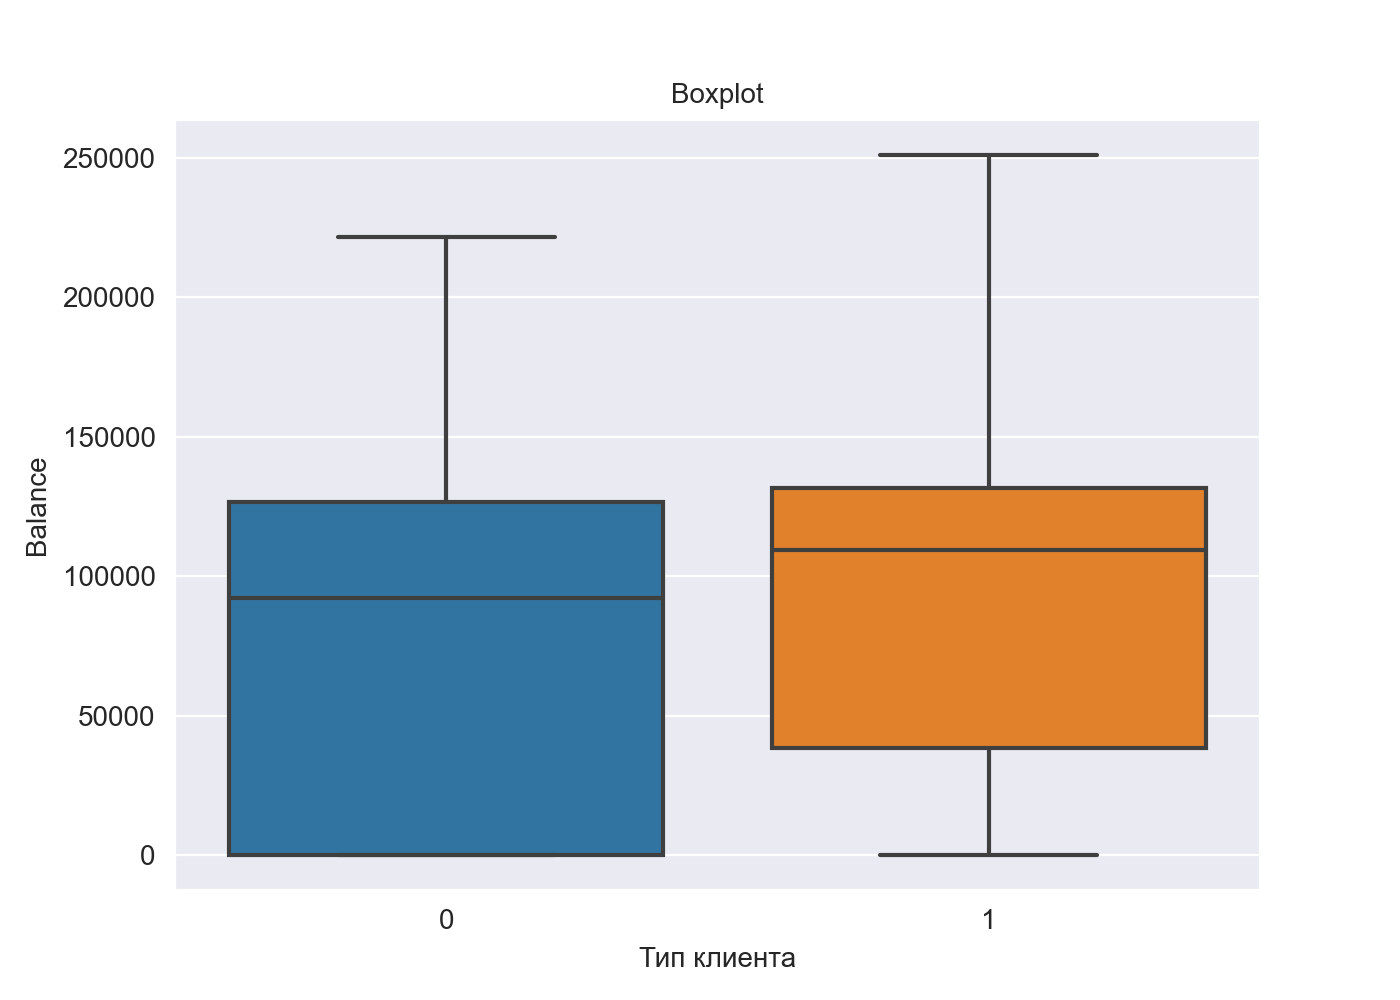

In [5]:
fig = plt.figure(figsize=(7, 5))
boxplot = sns.boxplot(data=churn_data, x='Exited', y='Balance')
boxplot.set_title('Boxplot', fontsize=10)
boxplot.set_xlabel('Тип клиента')
boxplot.set_ylabel('Balance');

Заметное различие в 25% квантили (медианна и 75% квантиль слабо различаются), а отсюда различие в межквартильном размахе. У покинувших банк клиентов основная сумма на считах заключенна в диапозоне 38000-130000 дол. Похоже, что банк покинули более состоятельные клиенты. Что их может не устраивать? Наверное низкие проценты.

#### 

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

<IPython.core.display.Javascript object>


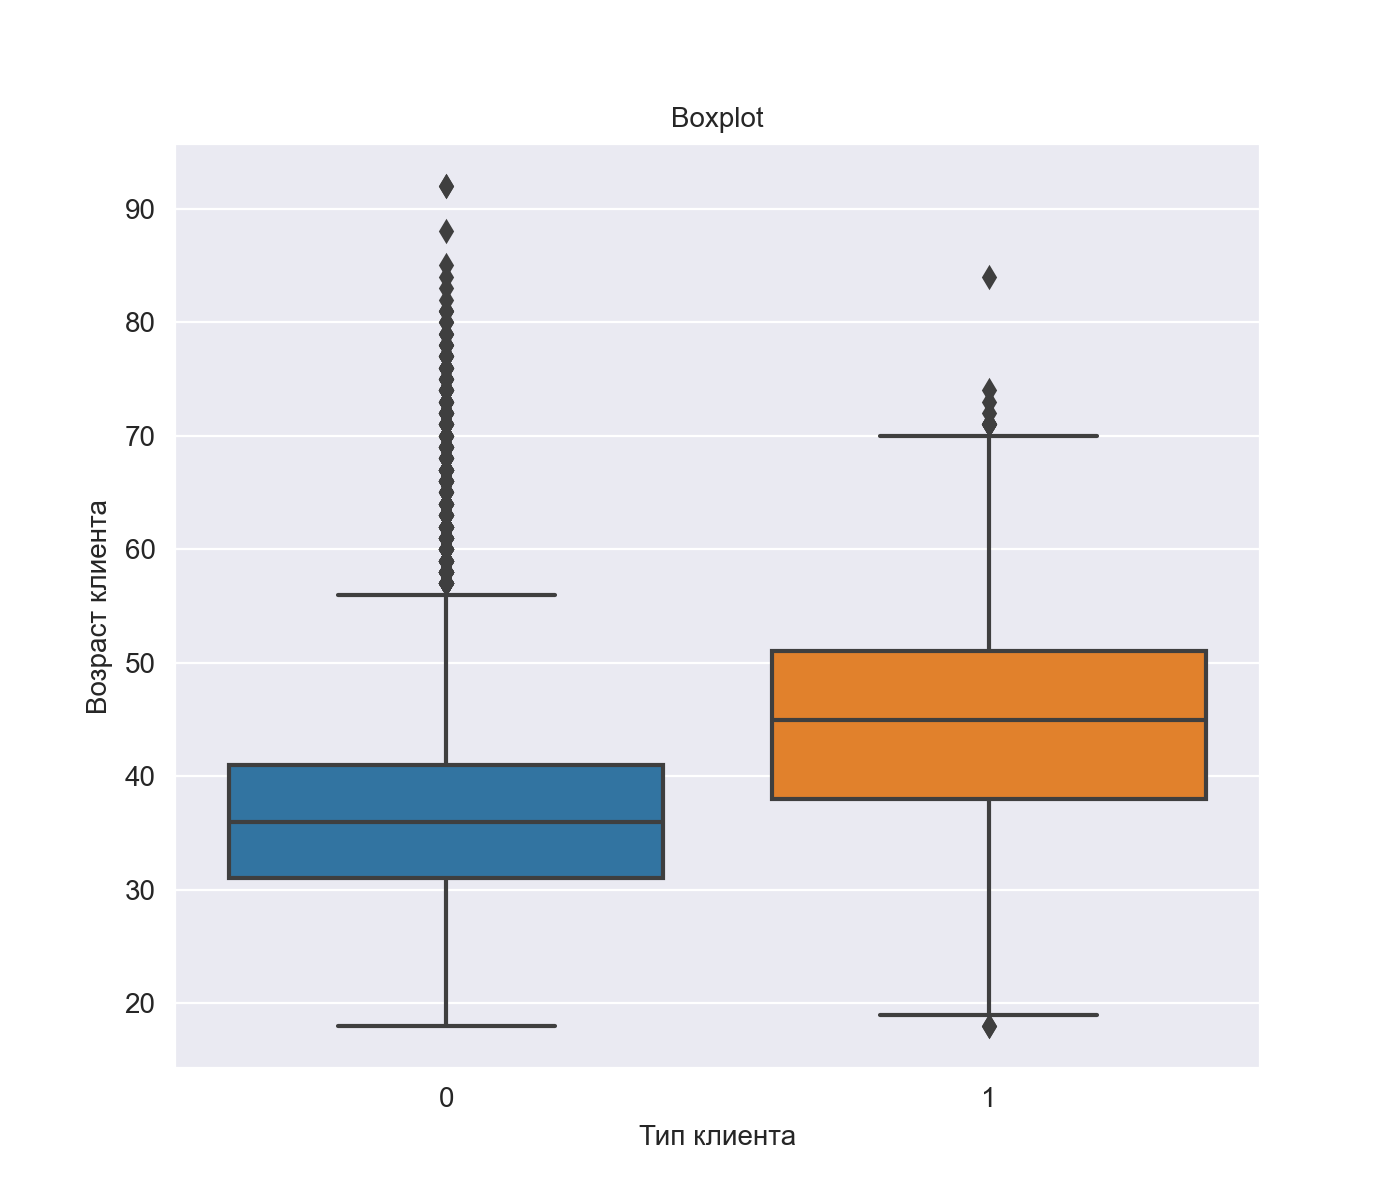

In [6]:
fig = plt.figure(figsize=(7, 6))
boxplot = sns.boxplot(data=churn_data, x='Exited', y='Age')
boxplot.set_title('Boxplot', fontsize=10)
boxplot.set_xlabel('Тип клиента')
boxplot.set_ylabel('Возраст клиента');

В группе активных клиентов больше потенциальных выбросов. Банку стоит обратить внимание на возрастную группу > 55 лет

#### 

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

<IPython.core.display.Javascript object>


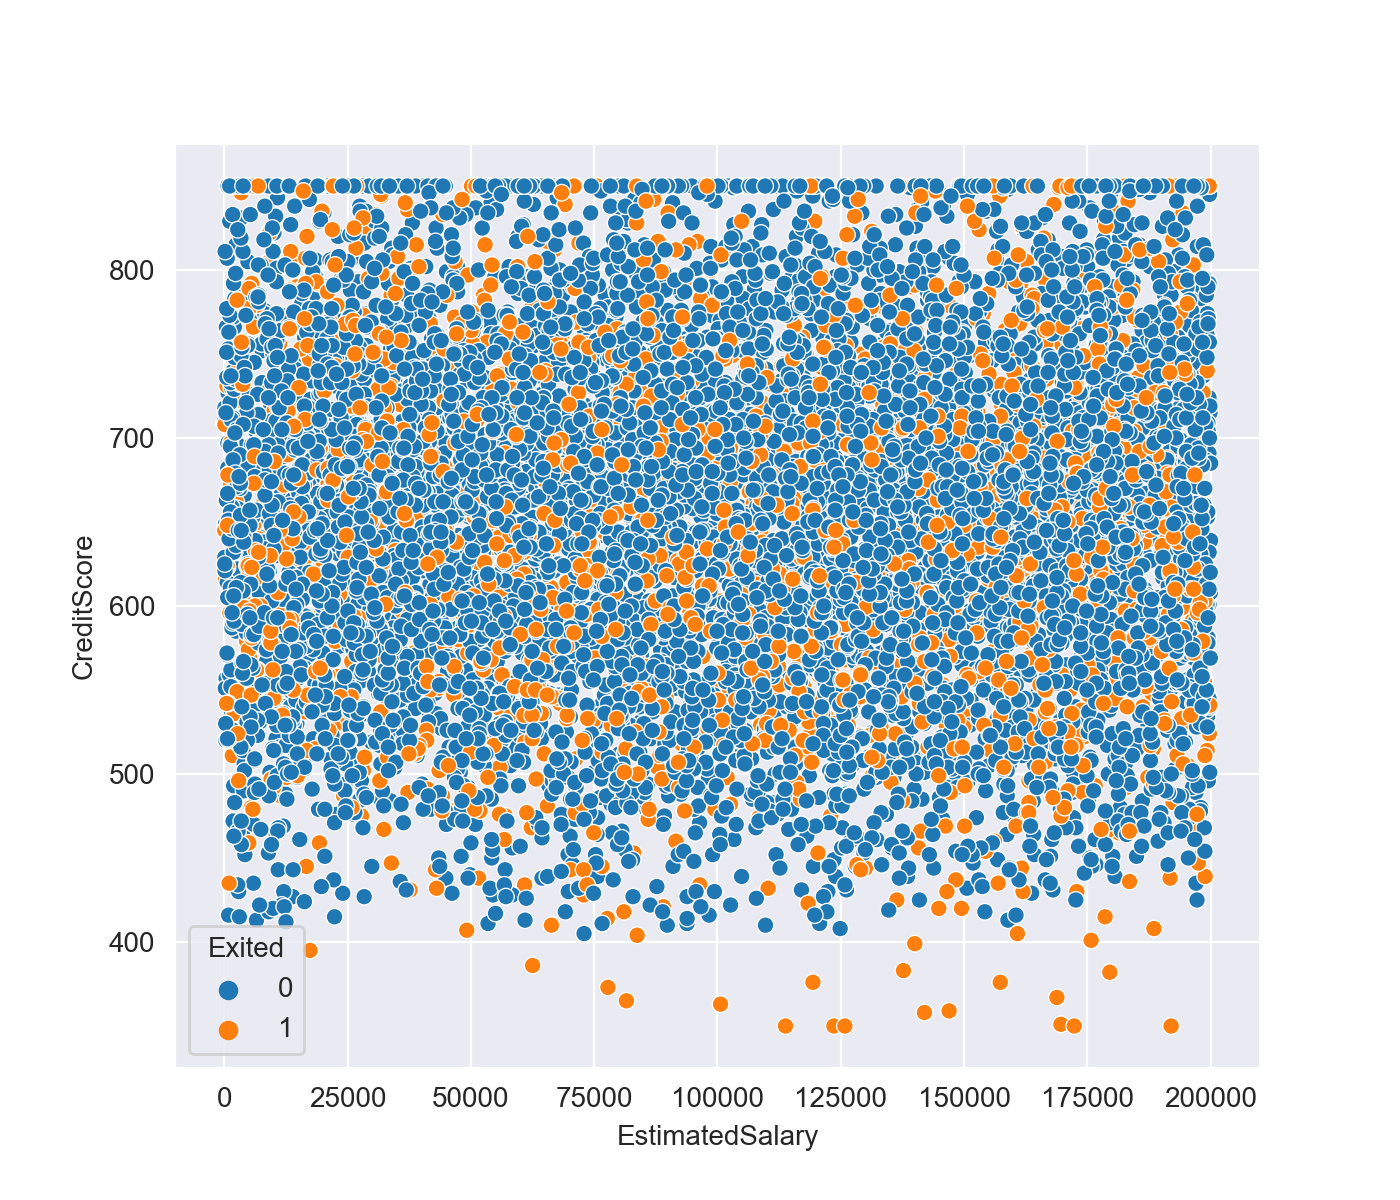

In [7]:
fig = plt.figure(figsize=(7, 6))
sns.scatterplot(data=churn_data, x="EstimatedSalary", y="CreditScore", hue='Exited')
fig.show()

Явной связи между признаками не просматривается. Можно отметить, что все кто имел кредитный рейтинг < 400 покинули банк

#### 

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [8]:
fig = px.pie(churn_data[churn_data['Exited']==1], 
             values='Exited', names='Gender', 
             title='Left the bank',
             height=500,
             width=700
            )
fig.show()

 Из диаграммы видно, что женщины уходили чаще. 

### 

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [9]:
def map_numbofprod(numbofprod):
    if numbofprod == 1:
        return "NumberofProd-1"
    elif numbofprod == 2:
        return "NumberofProd-2"
    elif numbofprod == 3:
        return "NumberofProd-3"
    elif numbofprod == 4:
        return "NumberofProd-4"
    
numofproducts = [len(churn_data[churn_data["NumOfProducts"]==n]) \
                 for n in np.sort(pd.unique(churn_data["NumOfProducts"]))
                ]
numofproducts = pd.DataFrame(np.reshape(numofproducts, (len(numofproducts),1)), columns=['Total'])

churn_data["NumOfProducts"] = churn_data["NumOfProducts"].apply(lambda x: map_numbofprod(x))
bar_data = churn_data.groupby(
    by='NumOfProducts',
    as_index=False
)[["Exited"]].sum()

bar_data = pd.concat([bar_data, numofproducts], axis=1)
bar_data = bar_data.rename(columns={"Exited": "Exited-1"})
bar_data['Exited-0'] = bar_data.Total - bar_data['Exited-1']

fig = px.bar(bar_data, x="NumOfProducts", y=["Exited-1", "Exited-0"], title="Number of Prod and Exited",
            height=500,
             width=700)
fig.show()

Из диаграммы видно, что чем больше количество продуктов банка используется, тем меньше отток клиентов. Правильней сказать - с увеличением числа услуг банка доля людей в общем количестве покинувших банк и пользовавшихся этим количеством услуг падает. 

#### 

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [10]:
def map_isactivemember(isactivemember):
    if isactivemember == 1:
        return "ActiveMember"
    elif isactivemember == 0:
        return "Not ActiveMember"
    

IsActiveMember = [len(churn_data[churn_data["IsActiveMember"]==n]) \
                 for n in np.sort(pd.unique(churn_data["IsActiveMember"]))
                ]
IsActiveMember = pd.DataFrame(np.reshape(IsActiveMember, (len(IsActiveMember),1)), columns=['Total'])

churn_data["IsActiveMember"] = churn_data["IsActiveMember"].apply(lambda x: map_isactivemember(x))
bar_data = churn_data.groupby(
    by='IsActiveMember',
    as_index=False
)[["Exited"]].sum()

bar_data = pd.concat([bar_data, IsActiveMember], axis=1)
bar_data = bar_data.rename(columns={"Exited": "Exited-1"})
bar_data['Exited-0'] = bar_data.Total - bar_data['Exited-1']


fig = px.bar(bar_data, x="IsActiveMember", y=["Exited-1", "Exited-0"], 
             title="Active Client and Exited", 
             height=500,
             width=700
            )
fig.show()

Из диаграммы видно, что наличие активного статуса снижает вероятность покидания банка(неактивные покидают почти в два раза чаще). Можно посоветовать банку - разнообразить число продуктов.

#### 

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
choropleth_data = churn_data.groupby(
    by='Geography',
    as_index=False
)[["Exited"]].sum()

fig = px.choropleth(
    data_frame=choropleth_data, 
    locations="Geography", 
    locationmode = "country names",
    color="Exited", 
    range_color=[0, 800],
    title='Exited clients',
    width=700, 
    height=400, 
    color_continuous_scale='Reds' 
)
fig.show()

Наибольшая доля покинувших в Германии. Это может быть связанно с чем угодно. Например - из вопроса 9.4 было видно ,что покинувшие банк клиенты в среднем более состоятельные. Возможно, экономика Франции и Германии лучше чем Испании и число состоятельных людей больше чем в Испании и поэтому большая часть покинувших банк приходится на эти страны.

#### 

9.10. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

<IPython.core.display.Javascript object>


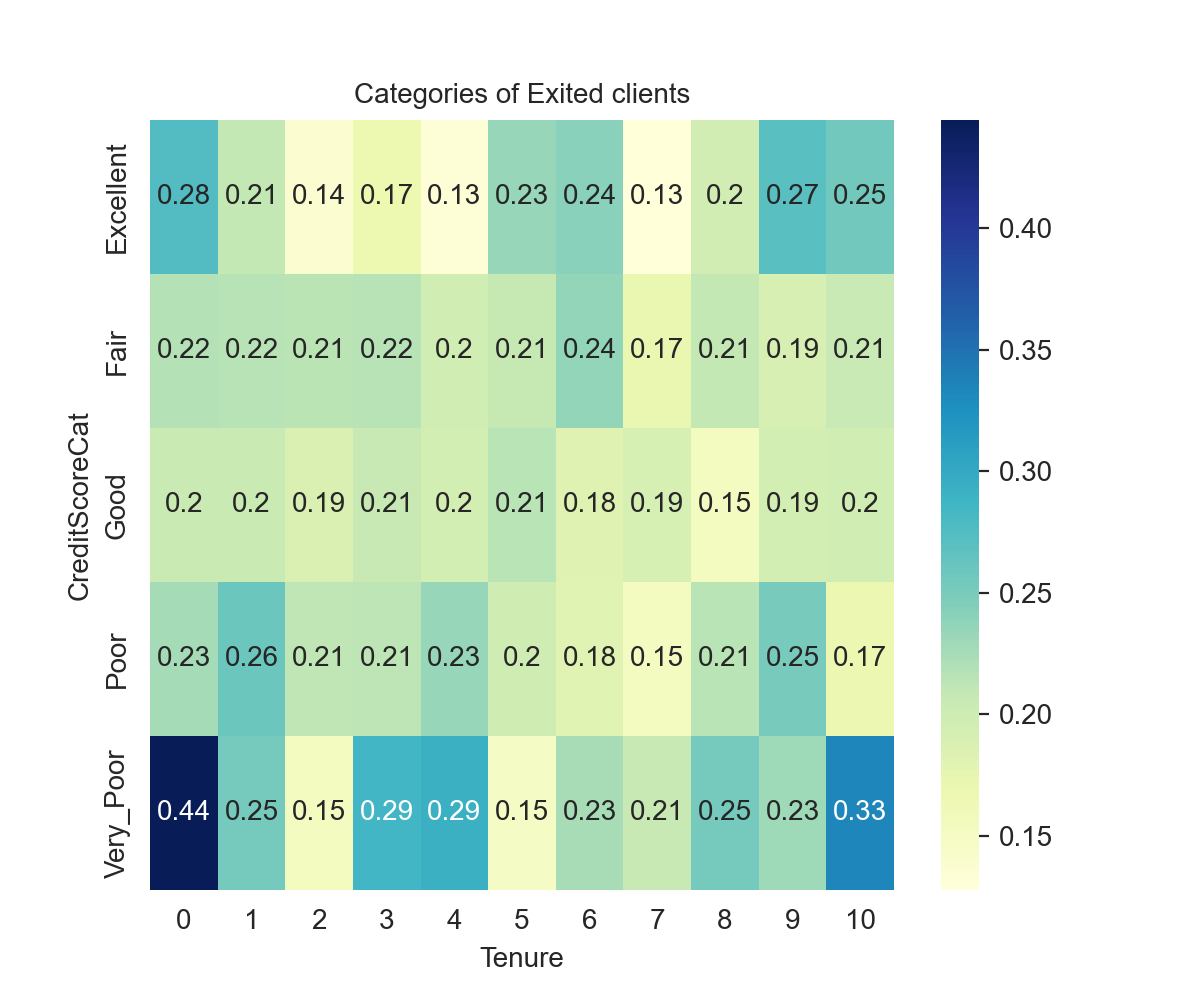

In [12]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"    
    

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(lambda x: get_credit_score_cat(x))
 
    
pivot_table = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=0
)


fig = plt.figure(figsize=(6, 5))
heatmap = sns.heatmap(data=pivot_table, annot=True, cmap='YlGnBu')
heatmap.set_title('Categories of Exited clients', fontsize=10);
fig.show()

Из тепловой карты видны категории которые уходят чаще. Вот пятерка первых:                       1.Very_Poor_0,                                                                                  2.Very_Poor_10,                                                                                     3.Very_Poor_3,                                                                                    4.Very_Poor_4,                                                                                           5.Excellent_0. По кредитным категориям - в среднем чаще уходят две категори: Very_Poor и Excellent